In [3]:
import pandas as pd
import seaborn ; seaborn.set()

#xlsx_data = pd.read_excel("/home/adzavon/Desktop/Sara project/second/Africa_1997-2022_Nov04.xlsx")
#into_csv = xlsx_data.to_csv("/home/adzavon/Desktop/Sara project/second/conflicts_data.csv")

data_conflicts_csv = pd.read_csv("/home/adzavon/Desktop/Sara project/second/conflicts_data.csv")

data_conflicts_csv.columns

Index(['Unnamed: 0', 'ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE',
       'YEAR', 'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP'],
      dtype='object')

In [4]:
len(data_conflicts_csv)
data_conflicts_csv.shape

(299327, 30)

2-

3-

In [5]:
data_conflicts_csv.columns

Index(['Unnamed: 0', 'ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE',
       'YEAR', 'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP'],
      dtype='object')

1.4

In [6]:
data_conflicts_csv.isnull().sum()

Unnamed: 0               0
ISO                      0
EVENT_ID_CNTY            0
EVENT_ID_NO_CNTY         0
EVENT_DATE               0
YEAR                     0
TIME_PRECISION           0
EVENT_TYPE               0
SUB_EVENT_TYPE           0
ACTOR1                   0
ASSOC_ACTOR_1       221640
INTER1                   0
ACTOR2               81424
ASSOC_ACTOR_2       241595
INTER2                   0
INTERACTION              0
REGION                   0
COUNTRY                  0
ADMIN1                   2
ADMIN2                2343
ADMIN3              156112
LOCATION                 0
LATITUDE                 0
LONGITUDE                0
GEO_PRECISION            0
SOURCE                   0
SOURCE_SCALE             0
NOTES                 9269
FATALITIES               0
TIMESTAMP                0
dtype: int64

1.5

In [7]:
armed_conflict = data_conflicts_csv[['COUNTRY', 'LATITUDE', 'LONGITUDE','YEAR','EVENT_DATE','EVENT_TYPE',"TIMESTAMP"]]
armed_conflict_batllte = armed_conflict[armed_conflict["EVENT_TYPE"] == "Battles"]
armed_conflict_batllte.to_csv("/home/adzavon/Desktop/Sara project/second/conflicts_data_battle.csv")
batle = pd.read_csv("/home/adzavon/Desktop/Sara project/second/conflicts_data_battle.csv")
batle.head()

,Unnamed: 0,COUNTRY,LATITUDE,LONGITUDE,YEAR,EVENT_DATE,EVENT_TYPE,TIMESTAMP
0,6,Algeria,36.803,2.922,1997,1997-01-06,Battles,1618524747
1,9,Algeria,36.672,2.789,1997,1997-01-07,Battles,1582579226
2,12,Algeria,36.165,1.334,1997,1997-01-11,Battles,1582579226
3,15,Algeria,36.165,1.334,1997,1997-01-13,Battles,1582579226
4,18,Algeria,36.752,3.042,1997,1997-01-15,Battles,1618442078


In [8]:
batle.tail(2)

,Unnamed: 0,COUNTRY,LATITUDE,LONGITUDE,YEAR,EVENT_DATE,EVENT_TYPE,TIMESTAMP
77298,299133,Zambia,-15.437,28.235,2021,2021-01-28,Battles,1612815317
77299,299193,Zambia,-15.417,28.283,2021,2021-08-12,Battles,1630983495


1.4 - What is the average (mean) parasite rate (%)? Calculate.

In [9]:
West_africa_obs["COUNTRY"].value_counts().mean()

NameError: name 'West_africa_obs' is not defined

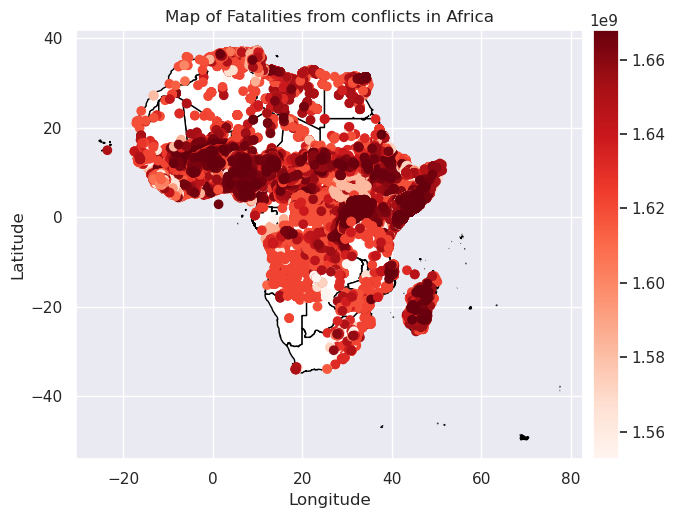

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

batle_geo = gpd.GeoDataFrame(batle, geometry=gpd.points_from_xy(batle.LONGITUDE, batle.LATITUDE))


africa = gpd.read_file('/home/adzavon/Desktop/Sara project/exo2/africa.shp')
africa_simple = africa[["SOVEREIGNT","geometry"]]

fig, ax = plt.subplots(figsize=(7, 7))

africa_simple.plot(ax=ax,color='white',edgecolor='black')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

batle_geo.plot(column = "TIMESTAMP",legend = True, cmap = "Reds", ax=ax,cax=cax)


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Map of Fatalities from conflicts in Africa')
plt.savefig("country_conflicts.png")

plt.show()

1.8

In [11]:
from pointpats import PointPattern
batle_geo = gpd.GeoDataFrame(batle, geometry=gpd.points_from_xy(batle.LONGITUDE, batle.LATITUDE))
batle_geo

/home/adzavon/anaconda3/lib/python3.9/site-packages/libpysal/examples/remotes.py:24: UserWarning: Remote data sets not available. Check connection.
  warnings.warn("Remote data sets not available. Check connection.")


,Unnamed: 0,COUNTRY,LATITUDE,LONGITUDE,YEAR,EVENT_DATE,EVENT_TYPE,TIMESTAMP,geometry
0,6,Algeria,36.803,2.922,1997,1997-01-06,Battles,1618524747,POINT (2.92200 36.80300)
1,9,Algeria,36.672,2.789,1997,1997-01-07,Battles,1582579226,POINT (2.78900 36.67200)
2,12,Algeria,36.165,1.334,1997,1997-01-11,Battles,1582579226,POINT (1.33400 36.16500)
3,15,Algeria,36.165,1.334,1997,1997-01-13,Battles,1582579226,POINT (1.33400 36.16500)
4,18,Algeria,36.752,3.042,1997,1997-01-15,Battles,1618442078,POINT (3.04200 36.75200)
...,...,...,...,...,...,...,...,...,...
77295,298994,Zambia,-15.417,28.283,2019,2019-01-04,Battles,1653503193,POINT (28.28300 -15.41700)
77296,299025,Zambia,-11.850,24.367,2019,2019-11-08,Battles,1649876508,POINT (24.36700 -11.85000)
77297,299027,Zambia,-8.762,31.114,2019,2019-12-05,Battles,1649356295,POINT (31.11400 -8.76200)
77298,299133,Zambia,-15.437,28.235,2021,2021-01-28,Battles,1612815317,POINT (28.23500 -15.43700)


In [12]:
pp= PointPattern(batle_geo[['LONGITUDE','LATITUDE']])
pp.df
pp
pp.summary()

Point Pattern
77300 points
Bounding rectangle [(-23.512,-34.107), (51.267,37.274)]
Area of window: 5337.799799
Intensity estimate for window: 14.48162218719436
       x       y
0  2.922  36.803
1  2.789  36.672
2  1.334  36.165
3  1.334  36.165
4  3.042  36.752


/home/adzavon/anaconda3/lib/python3.9/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/adzavon/anaconda3/lib/python3.9/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [13]:
pp.points
pp.head()

,x,y
0,2.922,36.803
1,2.789,36.672
2,1.334,36.165
3,1.334,36.165
4,3.042,36.752


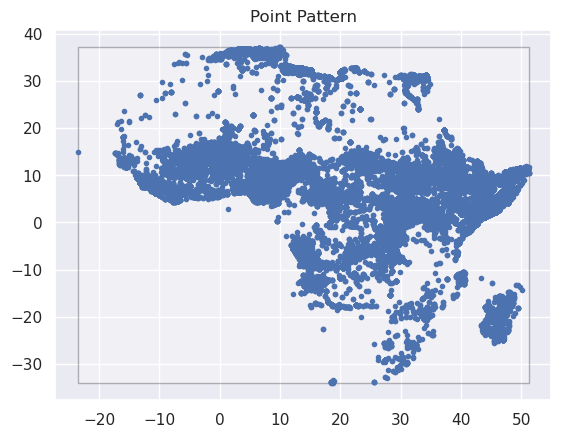

In [14]:
pp.plot(window=True)

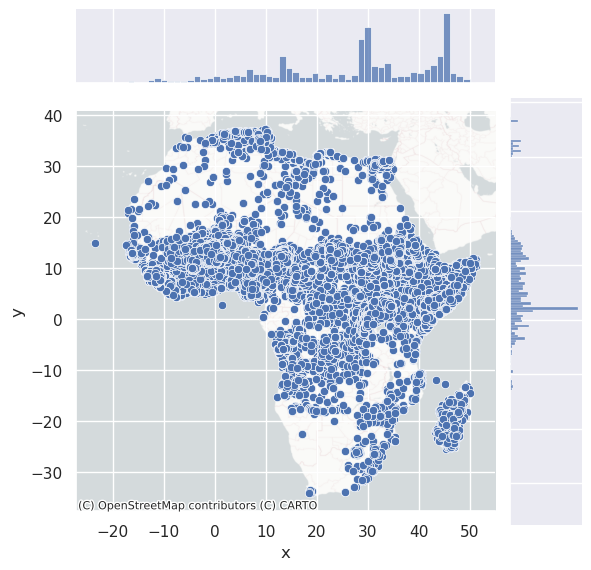

In [15]:
import seaborn as sns
import contextily
import matplotlib.pyplot as plt
plot = sns.jointplot(x="x", y="y", data=pp.df)
contextily.add_basemap( plot.ax_joint, crs="EPSG:4326", 
                       source=contextily.providers.CartoDB.PositronNoLabels)
plt.savefig("cluster.png")

In [16]:
from pointpats import centrography
std_distance = centrography.std_distance(pp.df[["x", "y"]])
mean_center = centrography.mean_center(pp.df[["x", "y"]])
med_center = centrography.euclidean_median(pp.df[["x", "y"]])
med_center, mean_center, std_distance
major, minor, rotation = centrography.ellipse(pp.df[["x", "y"]])
major, minor, rotation

(13.645122560133983, 20.04039711107077, -1.217297126313089)

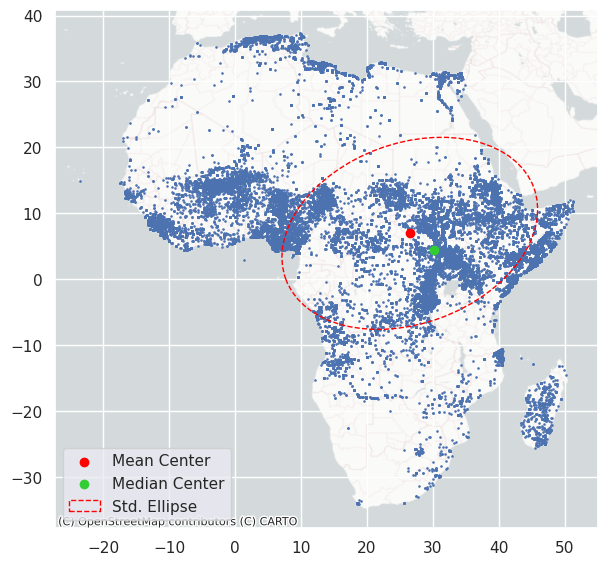

In [17]:
from matplotlib.patches import Ellipse
import numpy
import contextily 

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(7, 7))
# Plot photograph points
ax.scatter(pp.df["x"], pp.df["y"], s=0.75)

contextily.add_basemap(ax, crs="EPSG:4326", 
                       source=contextily.providers.CartoDB.PositronNoLabels)

ax.scatter(*mean_center, color="red", marker="o", label="Mean Center")
ax.scatter(*med_center, color="limegreen", marker="o", label="Median Center")
#ax.scatter(std_distance, color="yellow", label="standard distance")

# Construct the standard ellipse using matplotlib

ellipse = Ellipse(
    xy=mean_center,  # center the ellipse on our mean center
    width=major * 2,  # centrography.ellipse only gives half the axis
    height=minor * 2,
    angle=numpy.rad2deg(
        rotation
    ),  # Angles for this are in degrees, not radians
    facecolor="none",
    edgecolor="red",
    linestyle="--",
    label="Std. Ellipse",
)
ax.add_patch(ellipse)


ax.legend()

plt.savefig("ellipse.png")

plt.show()

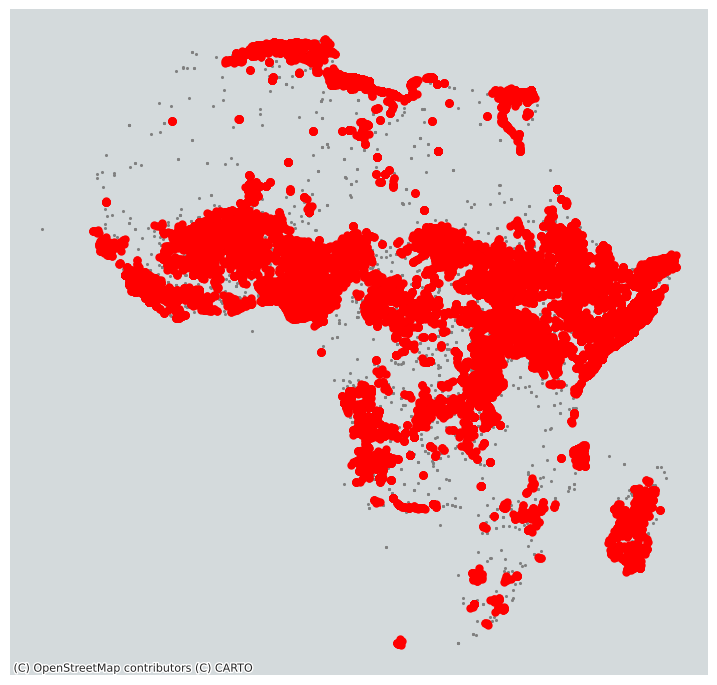

In [18]:
from sklearn.cluster import DBSCAN

# Define DBSCAN
clusterer = DBSCAN()
# Fit to our data
clusterer.fit(pp.df[["x", "y"]])


# Print the first 5 elements of `cs`
clusterer.core_sample_indices_[:5]

clusterer.labels_[:5]

lbls = pd.Series(clusterer.labels_, index=pp.df.index)


# Setup figure and axis
f, ax = plt.subplots(figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = pp.df.loc[lbls == -1, ["x", "y"]]
# Plot noise in grey
ax.scatter(noise["x"], noise["y"], c="grey", s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(
    pp.df.loc[pp.df.index.difference(noise.index), "x"],
    pp.df.loc[pp.df.index.difference(noise.index), "y"],
    c="red",
    linewidth=0,
)
# Add basemap
contextily.add_basemap(
    ax, source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.savefig("red_clusters.png")
plt.show()

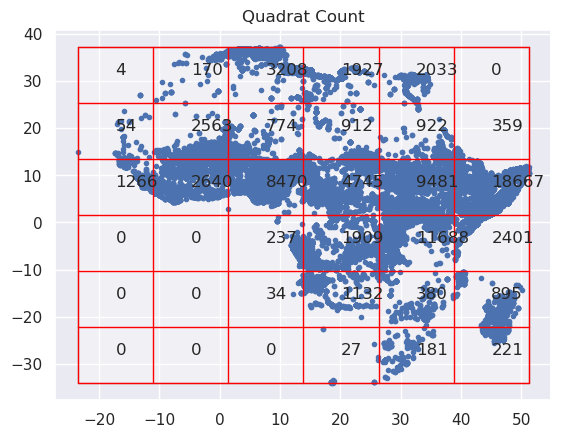

<Figure size 640x480 with 0 Axes>

In [19]:
import pointpats.quadrat_statistics as qs

q_r = qs.QStatistic(pp,shape= "rectangle",nx = 6, ny = 6)

q_r.plot()
plt.savefig("local_density.png")
#pl.savefig("local_density.png")
plt.show()

/home/adzavon/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


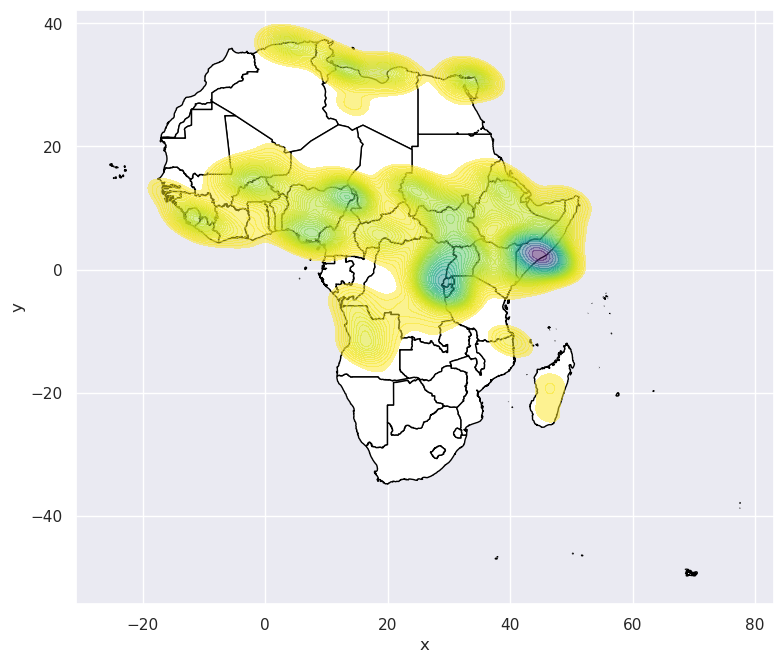

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, figsize=(9, 9))

africa.plot(ax=ax,color='white',edgecolor='black')
plot = sns.kdeplot(pp.df['x'], pp.df['y'],
                n_levels=50, shade=True,
                alpha=0.5, cmap='viridis_r')



plt.savefig("last_technique.png")

<AxesSubplot:>

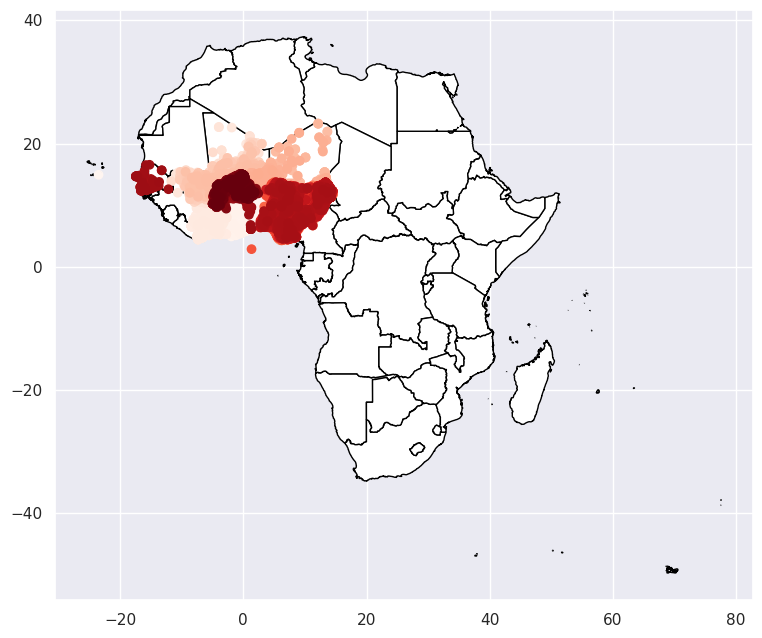

In [96]:
new_data_wascal = batle_geo["COUNTRY"].isin(["Senegal", 
                          "Burkina Faso",
                          "Mali", 
                          "Togo", 
                          "Gambia", 
                          "Ghana", 
                          "Nigeria", 
                          "Niger", 
                          "Benin", 
                          "Ivory Coast", 
                          "Cape Verde", 
                        ])

wascal_obs_geo = batle_geo[new_data_wascal]
wascal_obs_geo

#africa.plot(ax )


wascal_obs_geo_ge = wascal_obs_geo.to_file('/home/adzavon/Desktop/Sara project/wascal_obs_project2.shp')
#wascal_obs_geo_ge = wascal_obs_geo_geo.to_file('/home/adzavon/Desktop/Sara project/wascal_obs.tif')
wascal_obs_geo_shp = gpd.read_file('/home/adzavon/Desktop/Sara project/wascal_obs_project2.shp')
#wascal_obs_geo_shp.plot(ax=ax)


f, ax = plt.subplots(1, figsize=(9, 9))
africa.plot(ax=ax,color='white',edgecolor='black')
wascal_obs_geo_shp.plot(legend = True, cmap = "Reds", ax=ax)
#batle_geo.plot(legend = True, cmap = "Reds", ax=ax)

In [95]:
new_data = batle_geo["COUNTRY"].isin(["Senegal", 
                          "Burkina Faso",
                          "Mali", 
                          "Togo", 
                          "Gambia", 
                          "Ghana", 
                          "Nigeria", 
                          "Niger", 
                          "Benin", 
                          "Ivory Coast", 
                          "Mauritania", 
                          "Cape Verde", 
                          "Sierra Leone", 
                          "Guinea", 
                          "Guinea-Bissau", 
                          "Liberia"])

West_africa_obs = batle_geo[new_data]
West_africa_obs_geo = gpd.GeoDataFrame(West_africa_obs, geometry=gpd.points_from_xy(West_africa_obs.LONGITUDE, West_africa_obs.LATITUDE))

West_africa_obsv_geo = West_africa_obs_geo.to_file('/home/adzavon/Desktop/Sara project/second/West_africa_obs_project2.shp')
West_africa_obsv_geo = gpd.read_file('/home/adzavon/Desktop/Sara project//second/West_africa_obs_project2.shp')
West_africa_obsv_geo

#f, ax = plt.subplots(1, figsize=(9, 9))
#africa.plot(ax=ax,color='white',edgecolor='black')
#West_africa_obsv_geo.plot(legend = True, cmap = "Reds", ax=ax)

,Unnamed_ 0,COUNTRY,LATITUDE,LONGITUDE,YEAR,EVENT_DATE,EVENT_TYPE,TIMESTAMP,geometry
0,32660,Cape Verde,14.932,-23.512,2022,2022-03-26,Battles,1649703525,POINT (-23.51200 14.93200)
1,68111,Benin,6.483,2.617,2004,2004-08-18,Battles,1604354651,POINT (2.61700 6.48300)
2,68116,Benin,6.356,2.435,2007,2007-03-15,Battles,1618268923,POINT (2.43500 6.35600)
3,68137,Benin,6.356,2.435,2011,2011-08-01,Battles,1618268923,POINT (2.43500 6.35600)
4,68170,Benin,6.397,2.585,2015,2015-01-30,Battles,1618525199,POINT (2.58500 6.39700)
...,...,...,...,...,...,...,...,...,...
14716,297808,Burkina Faso,11.932,0.397,2022,2022-10-29,Battles,1667851740,POINT (0.39700 11.93200)
14717,297815,Burkina Faso,14.640,0.152,2022,2022-10-30,Battles,1667851741,POINT (0.15200 14.64000)
14718,297826,Burkina Faso,12.873,-0.700,2022,2022-11-01,Battles,1667851741,POINT (-0.70000 12.87300)
14719,297836,Burkina Faso,12.050,0.783,2022,2022-11-04,Battles,1667851740,POINT (0.78300 12.05000)


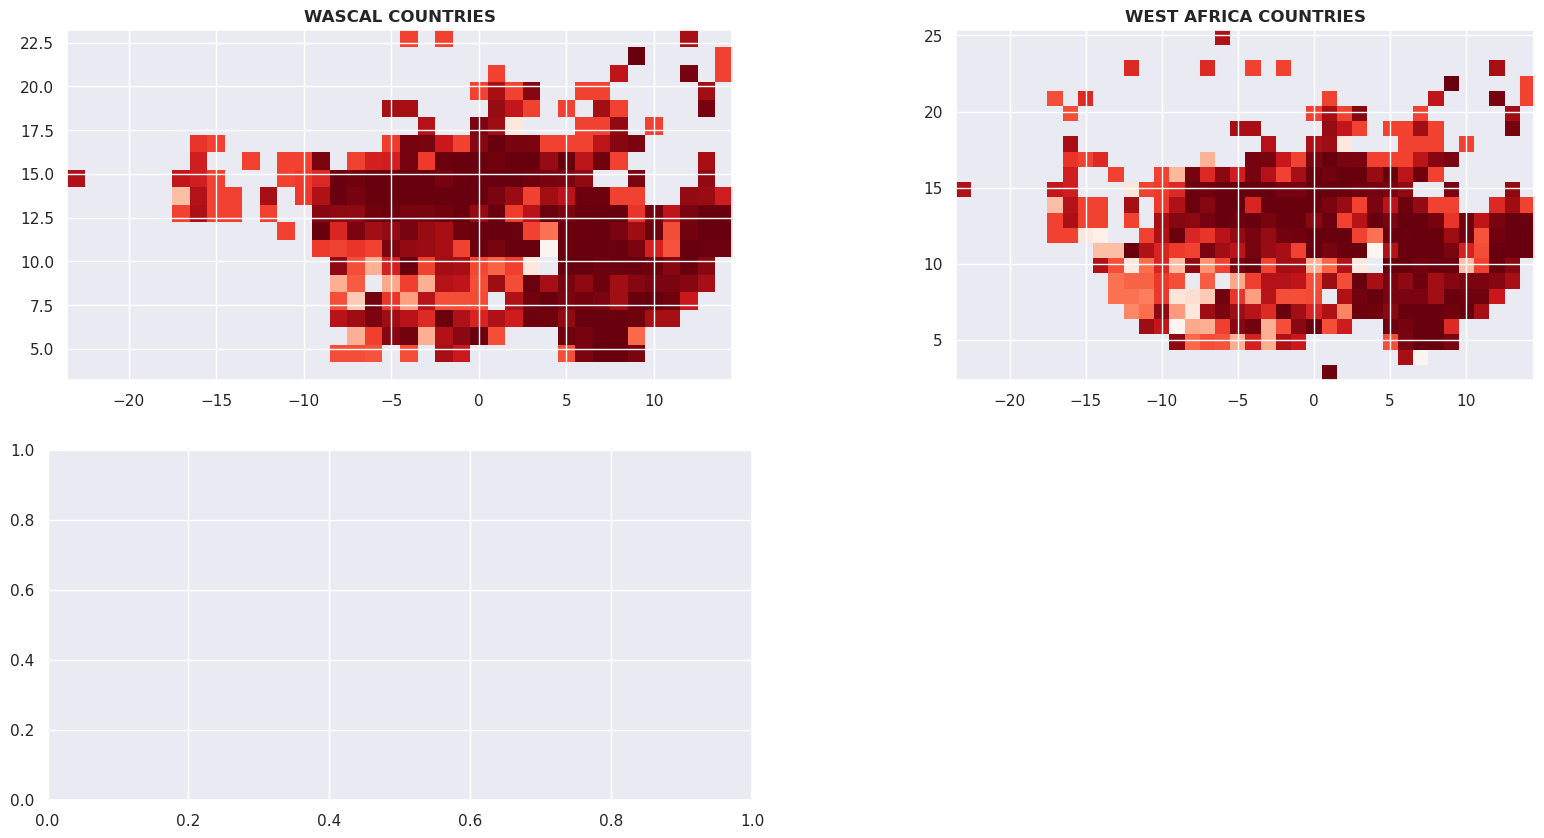

In [99]:
import rasterio 
    
from rasterio import plot
    
import geopandas as gpd
    
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize']=9,4

# Read raster
b1 = rasterio.open("/home/adzavon/Desktop/Sara project/last_interpolation/raster_wascal_obs_project2.tif")
b2 = rasterio.open("/home/adzavon/Desktop/Sara project/last_interpolation/raster_west_africa_obs_project2.tif")



ba1 = b1.read()
ba2 = b2.read()



fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))

p1  = rasterio.plot.show(b1, ax=ax[0,0], cmap='Reds', title='WASCAL COUNTRIES')
p2  = rasterio.plot.show(b2, ax=ax[0,1], cmap='Reds', title='WEST AFRICA COUNTRIES')




fig.delaxes(ax=ax[1,1]) 

plt.savefig("raster for second project.png")
plt.show()

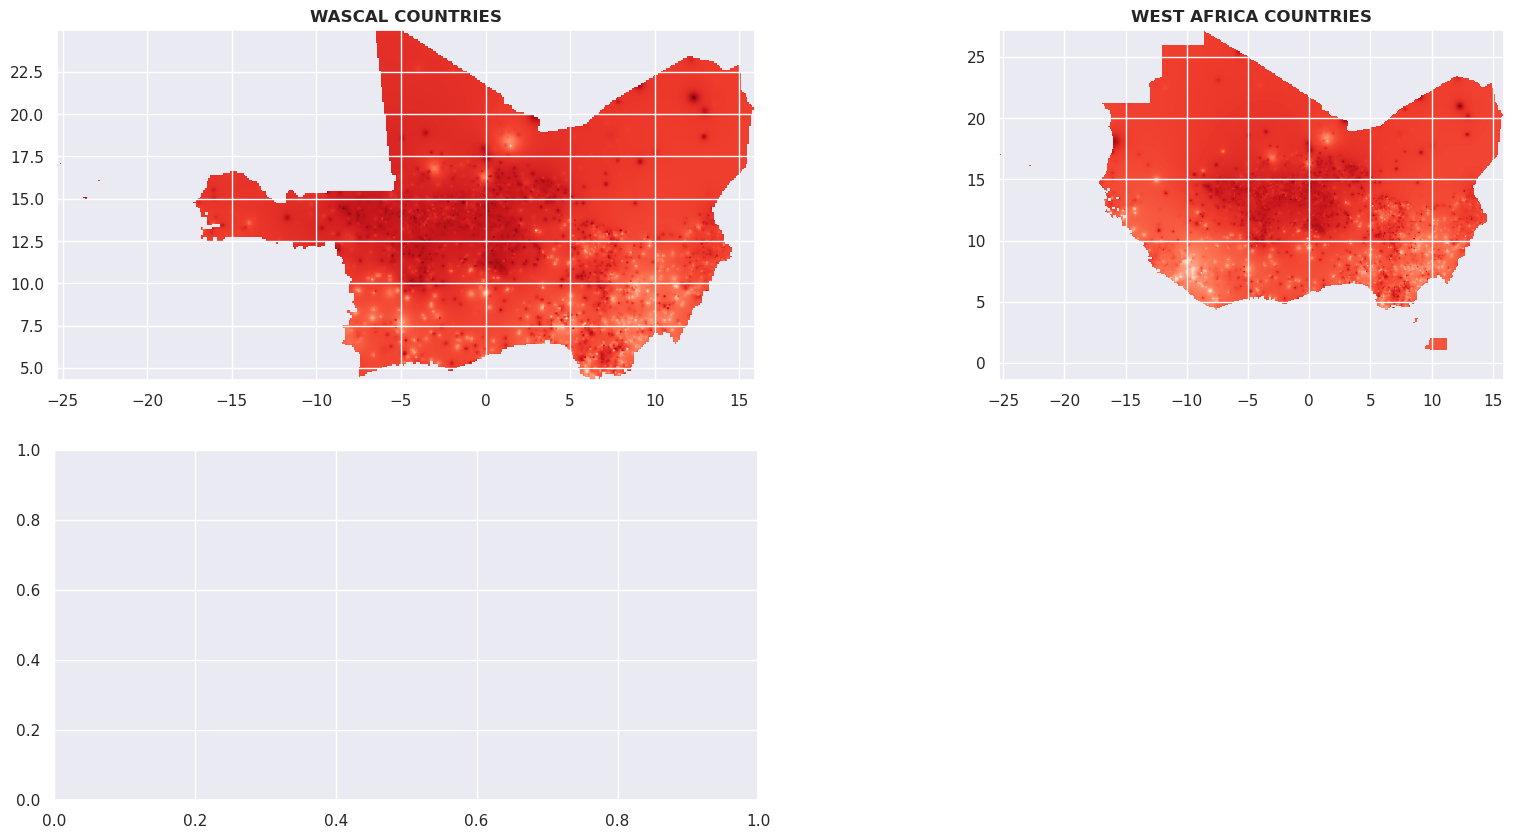

In [46]:
import rasterio 
    
from rasterio import plot
    
import geopandas as gpd
    
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize']=9,4

# Read raster
b1 = rasterio.open("/home/adzavon/Desktop/Sara project/wascal_obs.tif/wascal.tif")
b2 = rasterio.open("/home/adzavon/Desktop/Sara project/wascal_obs.tif/west_africa.tif")



ba1 = b1.read()
ba2 = b2.read()



fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))

p1  = rasterio.plot.show(b1, ax=ax[0,0], cmap='Reds', title='WASCAL COUNTRIES')
p2  = rasterio.plot.show(b2, ax=ax[0,1], cmap='Reds', title='WEST AFRICA COUNTRIES')




fig.delaxes(ax=ax[1,1]) 

plt.savefig("raster for second project.png")
plt.show()

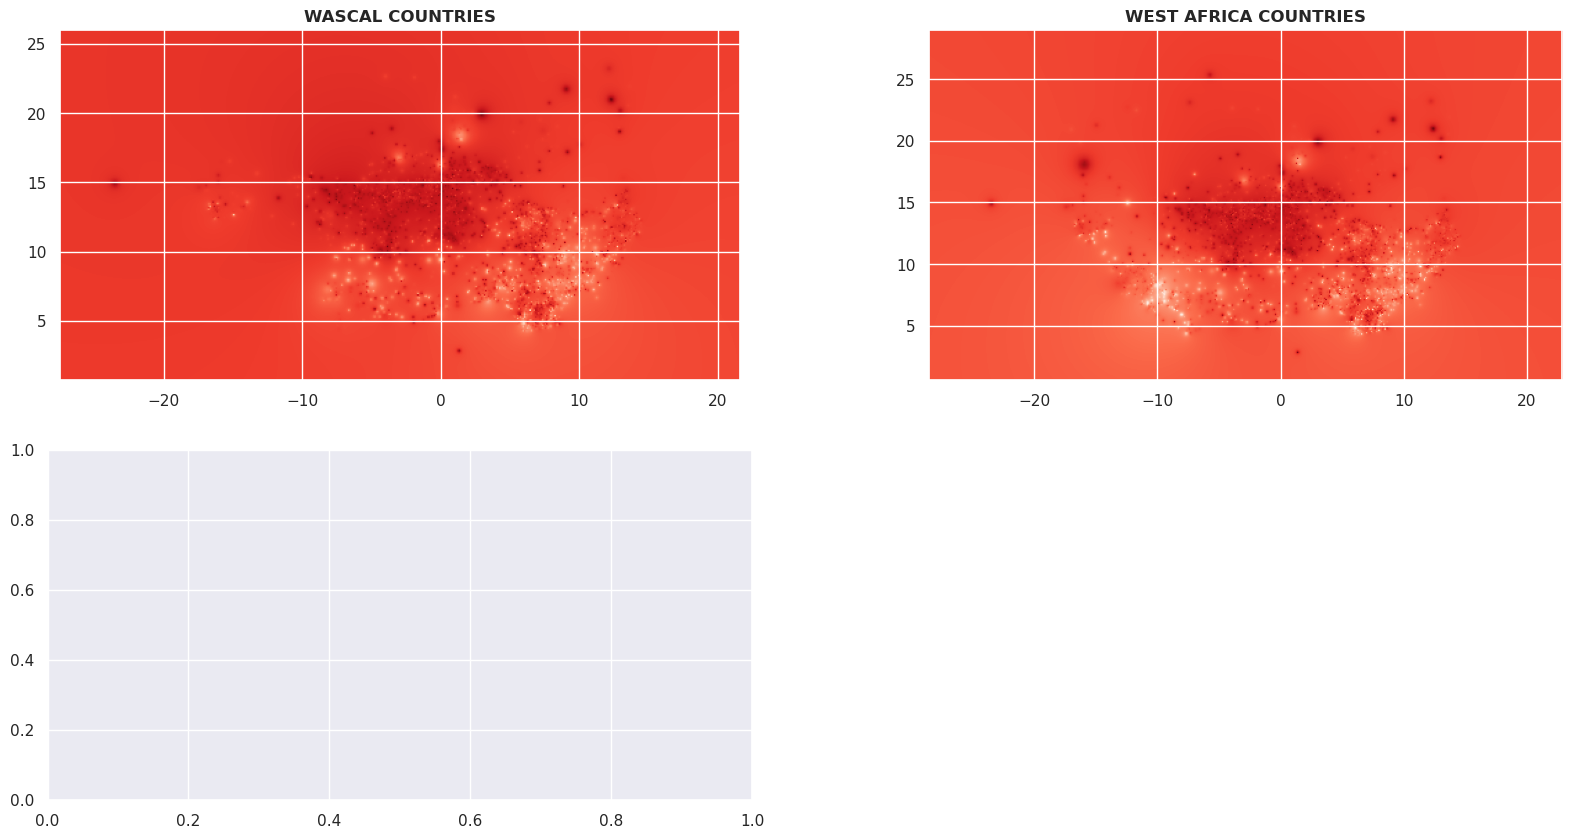

In [101]:
import rasterio 
    
from rasterio import plot
    
import geopandas as gpd
    
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize']=9,4

# Read raster
b1 = rasterio.open("/home/adzavon/Desktop/Sara project/last_interpolation/wascal_obs_project2.tif")
b2 = rasterio.open("/home/adzavon/Desktop/Sara project/last_interpolation/west_africa_obs_project2.tif")



ba1 = b1.read()
ba2 = b2.read()



fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))

p1  = rasterio.plot.show(b1, ax=ax[0,0], cmap='Reds', title='WASCAL COUNTRIES')
p2  = rasterio.plot.show(b2, ax=ax[0,1], cmap='Reds', title='WEST AFRICA COUNTRIES')




fig.delaxes(ax=ax[1,1]) 

plt.savefig("raster for second project.png")
plt.show()

In [89]:
count =(wascal_obs_geo["COUNTRY"].value_counts()/len(wascal_obs_geo))*100
count

Nigeria         57.493510
Mali            17.142632
Burkina Faso    10.880340
Niger            5.074345
Ivory Coast      4.743923
Senegal          2.014004
Ghana            1.510503
Benin            0.715915
Togo             0.243883
Gambia           0.173078
Cape Verde       0.007867
Name: COUNTRY, dtype: float64

In [91]:
wascal_obs_geo["COUNTRY"].value_counts().mean()

1155.5454545454545

In [ ]:
count.plot(kind = "bar")
plt.savefig("occu.png")
plt.ylabel("Country")
plt.xlabel("Number of timestamp")

In [94]:
wascal_obs_geo["COUNTRY"].value_counts()

Nigeria         7308
Mali            2179
Burkina Faso    1383
Niger            645
Ivory Coast      603
Senegal          256
Ghana            192
Benin             91
Togo              31
Gambia            22
Cape Verde         1
Name: COUNTRY, dtype: int64

Text(22.25, 0.5, 'Number of timestamp')

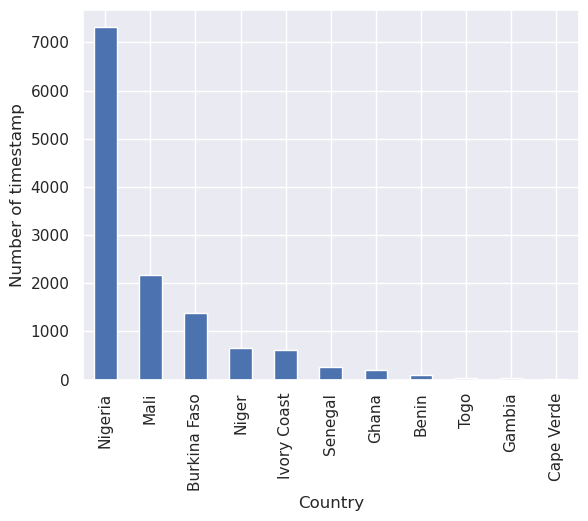

In [87]:
wascal_obs_geo["COUNTRY"].value_counts().plot(kind = "bar")
plt.savefig("occurence.png")
plt.xlabel("Country")
plt.ylabel("Number of timestamp")

In [74]:
wascal_obs_geo.groupby(["COUNTRY"]).mean(['EVEN_TYPE'])

,Unnamed: 0,LATITUDE,LONGITUDE,YEAR,TIMESTAMP
COUNTRY,,,,,
Benin,68510.703297,9.752495,2.366725,2019.890110,1.629239e+09
Burkina Faso,294269.537961,13.123753,-1.142286,2020.207520,1.640270e+09
Cape Verde,32660.000000,14.932000,-23.512000,2022.000000,1.649704e+09
Gambia,79172.318182,13.312773,-15.941818,2011.272727,1.618161e+09
Ghana,79938.083333,8.162818,-0.623120,2015.223958,1.613697e+09
Ivory Coast,84201.398010,6.660519,-5.557657,2009.159204,1.612996e+09
Mali,114895.019734,15.327228,-2.390637,2018.495640,1.632522e+09
Niger,132269.841860,14.611918,7.588245,2015.979845,1.630213e+09
Nigeria,147696.665435,9.416898,9.116874,2016.449644,1.616775e+09


KeyError: ('COUNTRY', 'EVENT_TYPE')